In [3]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


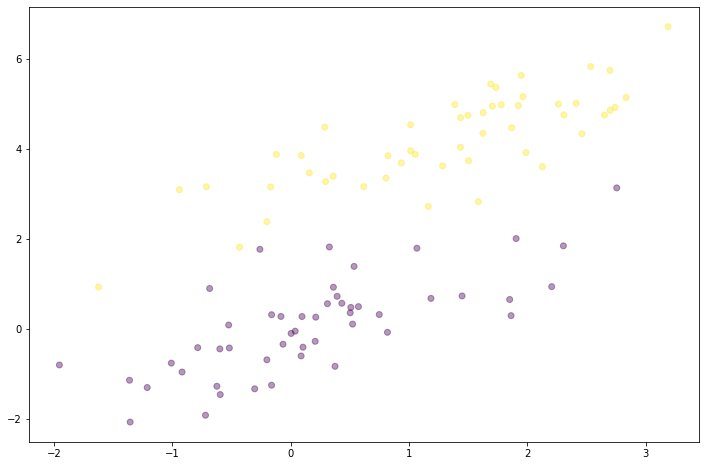

In [131]:
np.random.seed(12)
num_observations = 50

# todo: check the np.random.multivariate normal function
# np.hstack
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

y = np.where(y <= 0, -1, 1)

#Displaying the output
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = .4)


In [197]:
x1

array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       [ 0.03771096, -0.04730284],
       [-0.26047906,  1.77020391],
       [ 0.39217336,  0.72625091],
       [-0.59554603, -1.45480013],
       [-1.21247294, -1.29884588],
       [-0.62401997, -1.27022304],
       [ 0.53530969,  1.39076496],
       [-0.51854809, -0.42036902],
       [-0.78581739, -0.41293689],
       [ 1.86233668,  0.29727357],
       [ 2.20532595,  0.94095238],
       [ 2.30415076,  1.84634807],
       [ 0.50813952,  0.48041445],
       [-0.06520023, -0.33698294],
       [ 0.211607  ,  0.26340404],
       [ 1.18518509,  0.68041247],
       [ 0.20656092, -0.27281884],
       [ 0.57237373,  0.49751777],
       [-1.36222099, -1.13689061],
       [ 0.52271502,  0.10886786],
       [-0.68510452,  0.90010004],
       [ 2.75493946,  3.13333768],
       [-0.52422204,  0.08927225],
       [ 0.32652107,  1.82158822],
       [-0.91811827, -0.95447416],
       [ 0.10376971,

In [132]:
def Lagrangian(w, alpha):
    first_part = np.sum(alpha) 
    second_part = np.sum(np.dot(alpha*alpha*y*y*X.T, X))
    res = first_part- 0.5* second_part
    return res

In [168]:
def gradient_(w, X, y, b, lr):
    for i in range(2000):
        for idx, x_i in enumerate(X):
            y_i = y[idx]

            cond = y_i*(np.dot(x_i, w) -b) >=1
            if cond:
                w -= lr*2*w
            else:
                w-= lr*(2*w - np.dot(x_i, y_i))
                b -= lr * y_i    
    return w, b

In [170]:
w, b, lr = np.random.random(X.shape[1]), 0, 0.0001

In [171]:
w, b = gradient_(w, X, y, b, lr)

In [172]:
def predict(X, w, b):
    pred = np.dot(X, w) -b
    return np.sign(pred)

In [173]:
svm_pred = predict(X, w, b)

In [174]:
print(accuracy_score(y,svm_pred))

0.97


#### without B

In [189]:
def gradient_(w, X, y, lr):
    for i in range(3000):
        for idx, x_i in enumerate(X):
            y_i = y[idx]

            cond = y_i*(np.dot(x_i, w) -b) >=1
            if cond:
                w -= lr*2*w
            else:
                w-= lr*(2*w - np.dot(x_i, y_i))  
    return w 

In [190]:
w, lr = np.random.random(X.shape[1]), 0.0001

In [191]:
w = gradient_(w, X, y, lr)

In [192]:
def predict(X, w):
    pred = np.dot(X, w)
    return np.sign(pred)

In [193]:
svm_pred = predict(X, w)

In [194]:
print(accuracy_score(y,svm_pred))

0.73


In [182]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X,y)
y_pred = clf.predict(X)
print(accuracy_score(y,y_pred))


0.98
